In [6]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [7]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [8]:
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

In [9]:
x_val = x_train[-5000:]
y_val = y_train[-5000:]

x_tr = x_train[:-5000]
y_tr = y_train[:-5000]
print("Train shape:", x_tr.shape)
print("Validation shape:", x_val.shape)
print("Test shape:", x_test.shape)

Train shape: (55000, 28, 28)
Validation shape: (5000, 28, 28)
Test shape: (10000, 28, 28)


In [11]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dropout(0.1),   # prevent overfitting
    keras.layers.Dense(10, activation="softmax")
])

# 4) Compile Model
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [12]:
callbacks = [
    keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
]

history = model.fit(
    x_tr, y_tr,
    epochs=20,
    batch_size=32,
    validation_data=(x_val, y_val),
    callbacks=callbacks
)

Epoch 1/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9151 - loss: 0.2936 - val_accuracy: 0.9670 - val_loss: 0.1252
Epoch 2/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9596 - loss: 0.1375 - val_accuracy: 0.9714 - val_loss: 0.0983
Epoch 3/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9704 - loss: 0.0974 - val_accuracy: 0.9762 - val_loss: 0.0814
Epoch 4/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9772 - loss: 0.0758 - val_accuracy: 0.9794 - val_loss: 0.0723
Epoch 5/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9810 - loss: 0.0610 - val_accuracy: 0.9782 - val_loss: 0.0811
Epoch 6/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9835 - loss: 0.0517 - val_accuracy: 0.9790 - val_loss: 0.0785
Epoch 7/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9854 - loss: 0.0448 - val_accuracy: 0.9820 - val_loss: 0.0707
Epoch 8/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9878 - loss: 0.0382 - 

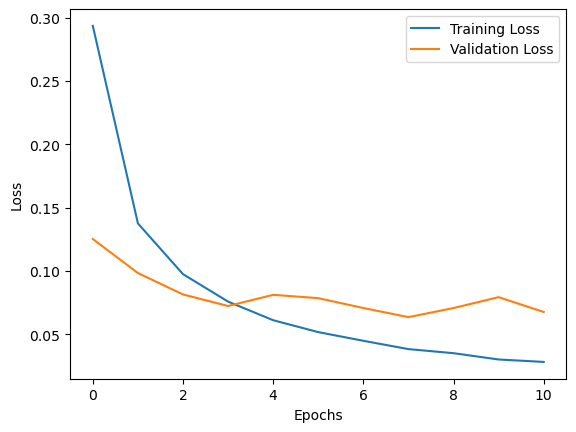

In [13]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [14]:
print("Final evaluation on test data:")
model.evaluate(x_test, y_test)

Final evaluation on test data:
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 917us/step - accuracy: 0.9796 - loss: 0.0691


[0.06914190948009491, 0.9796000123023987]

In [15]:
sample = x_test[13].reshape(1, 28, 28)
pred = model.predict(sample)
print("Predicted Label:", np.argmax(pred))
print("True Label:", y_test[13])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Predicted Label: 0
True Label: 0


## Task 1

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
Predicted Label: 1
True Label: 1


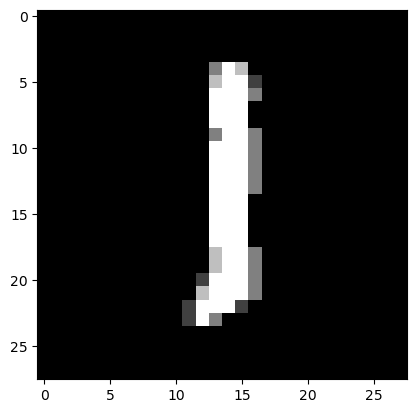

In [43]:
pred = model.predict(x_test[14].reshape(1, 28, 28))
print("Predicted Label:", np.argmax(pred))
print("True Label:", y_test[14])
plt.imshow(x_test[14], cmap="gray")
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
Predicted Label: 8
True Label: 8


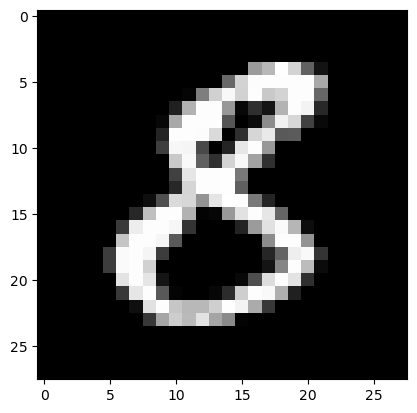

In [44]:
pred = model.predict(x_test[1234].reshape(1, 28, 28))
print("Predicted Label:", np.argmax(pred))
print("True Label:", y_test[1234])
plt.imshow(x_test[1234], cmap="gray")
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Predicted Label: 2
True Label: 2


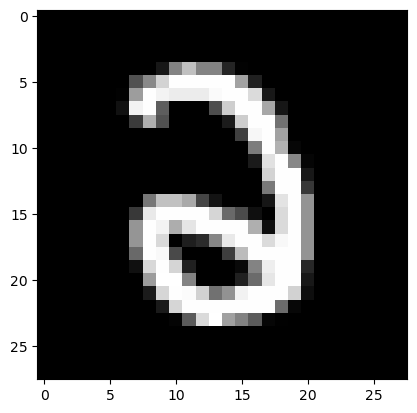

In [45]:
pred = model.predict(x_test[221].reshape(1, 28, 28))
print("Predicted Label:", np.argmax(pred))
print("True Label:", y_test[221])
plt.imshow(x_test[221], cmap="gray")
plt.show()

## Task 2

In [16]:
import cv2

img = cv2.imread(r"C:\Users\0001\Desktop\project\results\predictions\Hand written.png", cv2.IMREAD_GRAYSCALE)
# Resize to 28x28
img = cv2.resize(img, (28, 28))
#Normalize (0-1)
img = img / 255.0
#Reshape to match model input
img = img.reshape(1, 28, 28)
#Predict
prediction = model.predict(img)
print("Prediction:", np.argmax(prediction))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Prediction: 2


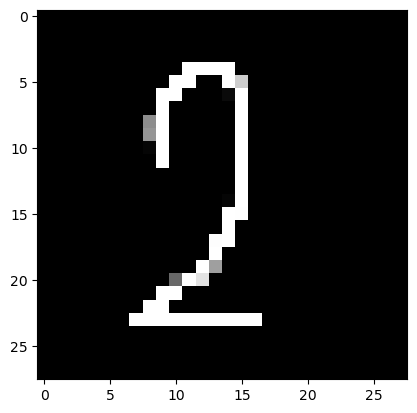

In [47]:
plt.imshow(img.reshape(28, 28), cmap="gray")
plt.show()

In [72]:

img = cv2.imread(r"C:\Users\0001\Desktop\project\results\predictions\Hand written 2.png", cv2.IMREAD_GRAYSCALE)
# Resize to 28x28
img = cv2.resize(img, (28, 28))
#Normalize (0-1)
img = img / 255.0
#Reshape to match model input
img = img.reshape(1, 28, 28)
#Predict
prediction = model.predict(img)
print("Prediction:", np.argmax(prediction))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Prediction: 3


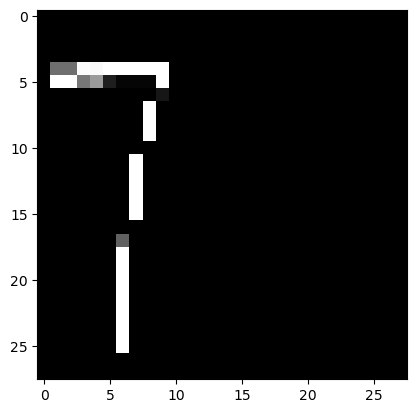

In [73]:
plt.imshow(img.reshape(28, 28), cmap="gray")
plt.show()

## Task 3

5 Epochs

Epoch 1/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9230 - loss: 0.2687 - val_accuracy: 0.9658 - val_loss: 0.1202
Epoch 2/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9641 - loss: 0.1189 - val_accuracy: 0.9690 - val_loss: 0.0992
Epoch 3/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9760 - loss: 0.0799 - val_accuracy: 0.9744 - val_loss: 0.0909
Epoch 4/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9812 - loss: 0.0605 - val_accuracy: 0.9776 - val_loss: 0.0789
Epoch 5/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9859 - loss: 0.0463 - val_accuracy: 0.9786 - val_loss: 0.0864


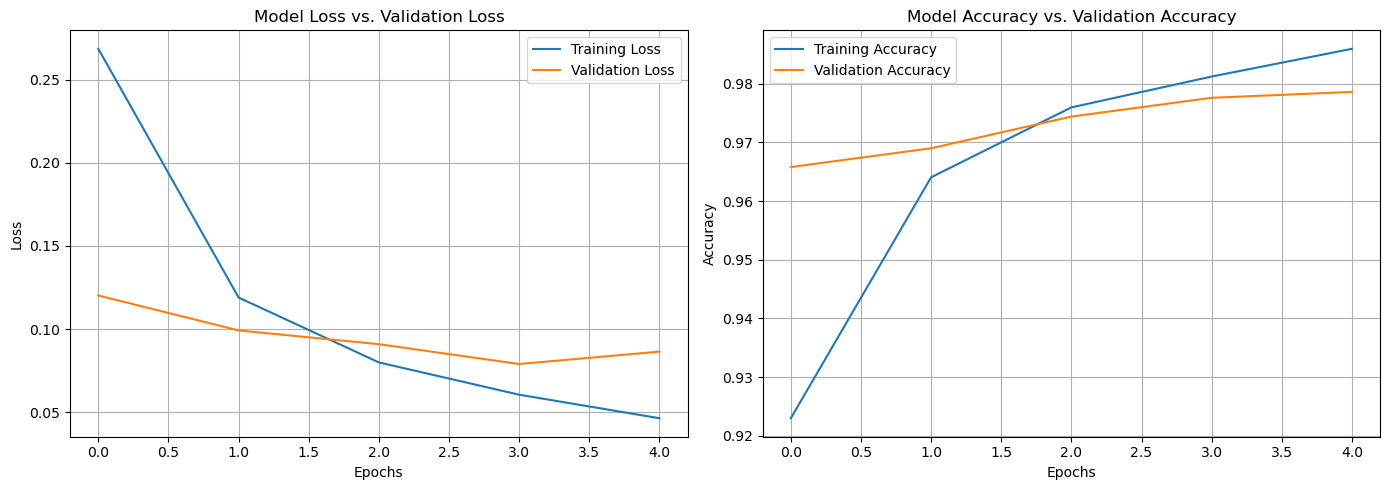

In [48]:
model_5 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

# 4) Compile Model
model_5.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

history = model_5.fit(
    x_tr, y_tr,
    epochs=5,
    batch_size=32,
    validation_data=(x_val, y_val),
)


fig, ax = plt.subplots(1, 2, figsize=(14, 5))

ax[0].plot(history.history['loss'], label='Training Loss')
ax[0].plot(history.history['val_loss'], label='Validation Loss')
ax[0].set_title('Model Loss vs. Validation Loss')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[0].legend()
ax[0].grid(True)

ax[1].plot(history.history['accuracy'], label='Training Accuracy')
ax[1].plot(history.history['val_accuracy'], label='Validation Accuracy')
ax[1].set_title('Model Accuracy vs. Validation Accuracy')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')
ax[1].legend()
ax[1].grid(True)

plt.tight_layout()
plt.show()

10 Epochs

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9210 - loss: 0.2764 - val_accuracy: 0.9592 - val_loss: 0.1351
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9633 - loss: 0.1254 - val_accuracy: 0.9720 - val_loss: 0.0984
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9746 - loss: 0.0852 - val_accuracy: 0.9712 - val_loss: 0.0929
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9808 - loss: 0.0639 - val_accuracy: 0.9722 - val_loss: 0.0847
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9846 - loss: 0.0493 - val_accuracy: 0.9736 - val_loss: 0.0841
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9874 - loss: 0.0401 - val_accuracy: 0.9774 - val_loss: 0.0824
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9902 - loss: 0.0313 - val_accuracy: 0.9796 - val_loss: 0.0728
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9923 - loss: 0.0253 - 

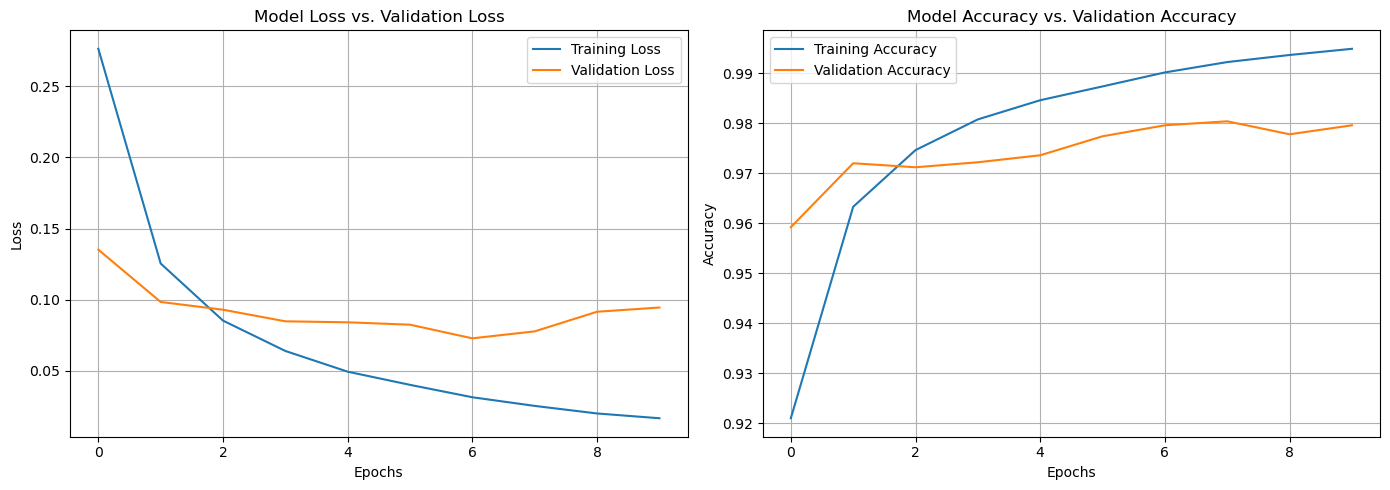

In [49]:
model_10 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

# 4) Compile Model
model_10.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])


history = model_10.fit(
    x_tr, y_tr,
    epochs=10,
    batch_size=32,
    validation_data=(x_val, y_val),
)

fig, ax = plt.subplots(1, 2, figsize=(14, 5))

ax[0].plot(history.history['loss'], label='Training Loss')
ax[0].plot(history.history['val_loss'], label='Validation Loss')
ax[0].set_title('Model Loss vs. Validation Loss')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[0].legend()
ax[0].grid(True)

ax[1].plot(history.history['accuracy'], label='Training Accuracy')
ax[1].plot(history.history['val_accuracy'], label='Validation Accuracy')
ax[1].set_title('Model Accuracy vs. Validation Accuracy')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')
ax[1].legend()
ax[1].grid(True)

plt.tight_layout()
plt.show()


20 Epochs

Epoch 1/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9241 - loss: 0.2660 - val_accuracy: 0.9676 - val_loss: 0.1160
Epoch 2/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9660 - loss: 0.1175 - val_accuracy: 0.9712 - val_loss: 0.0983
Epoch 3/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9758 - loss: 0.0807 - val_accuracy: 0.9754 - val_loss: 0.0862
Epoch 4/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9820 - loss: 0.0596 - val_accuracy: 0.9772 - val_loss: 0.0780
Epoch 5/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9852 - loss: 0.0460 - val_accuracy: 0.9768 - val_loss: 0.0812
Epoch 6/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9893 - loss: 0.0350 - val_accuracy: 0.9762 - val_loss: 0.0823
Epoch 7/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9915 - loss: 0.0277 - val_accuracy: 0.9796 - val_loss: 0.0785
Epoch 8/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9926 - loss: 0.0242 - 

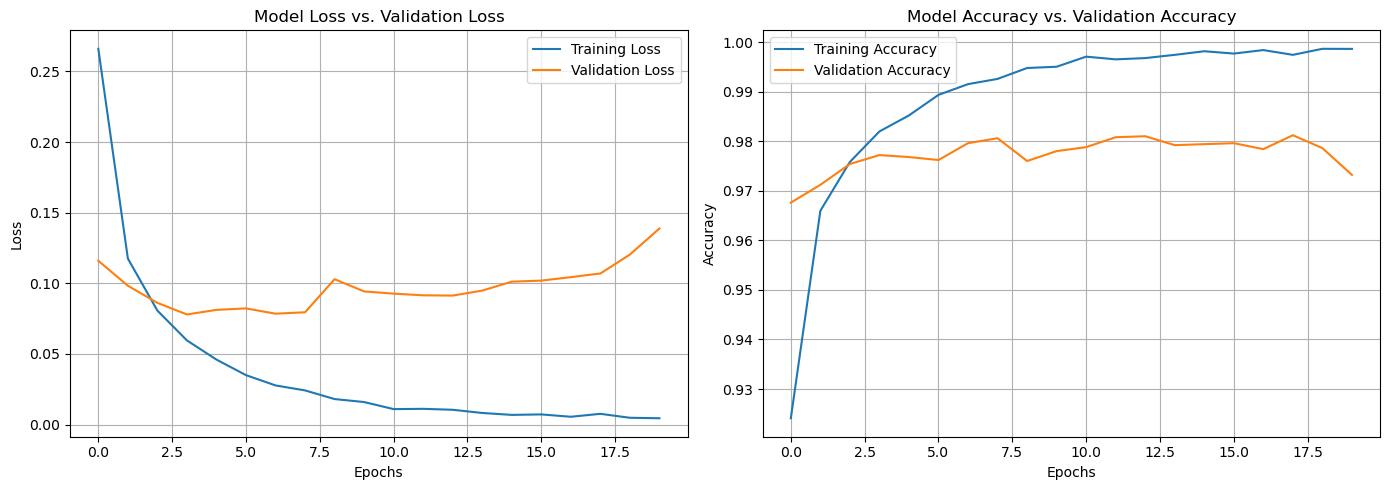

In [50]:
model_20 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

# 4) Compile Model
model_20.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
              
history = model_20.fit(
    x_tr, y_tr,
    epochs=20,
    batch_size=32,
    validation_data=(x_val, y_val),
)

fig, ax = plt.subplots(1, 2, figsize=(14, 5))

ax[0].plot(history.history['loss'], label='Training Loss')
ax[0].plot(history.history['val_loss'], label='Validation Loss')
ax[0].set_title('Model Loss vs. Validation Loss')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[0].legend()
ax[0].grid(True)

ax[1].plot(history.history['accuracy'], label='Training Accuracy')
ax[1].plot(history.history['val_accuracy'], label='Validation Accuracy')
ax[1].set_title('Model Accuracy vs. Validation Accuracy')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')
ax[1].legend()
ax[1].grid(True)

plt.tight_layout()
plt.show()


## Task 4

Patience = 3

Epoch 1/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9220 - loss: 0.2735 - val_accuracy: 0.9682 - val_loss: 0.1184
Epoch 2/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9641 - loss: 0.1214 - val_accuracy: 0.9734 - val_loss: 0.0909
Epoch 3/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9750 - loss: 0.0841 - val_accuracy: 0.9680 - val_loss: 0.0986
Epoch 4/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9802 - loss: 0.0636 - val_accuracy: 0.9754 - val_loss: 0.0880
Epoch 5/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9846 - loss: 0.0497 - val_accuracy: 0.9774 - val_loss: 0.0850
Epoch 6/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9883 - loss: 0.0379 - val_accuracy: 0.9790 - val_loss: 0.0801
Epoch 7/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9902 - loss: 0.0317 - val_accuracy: 0.9792 - val_loss: 0.0740
Epoch 8/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9925 - loss: 0.0251 - 

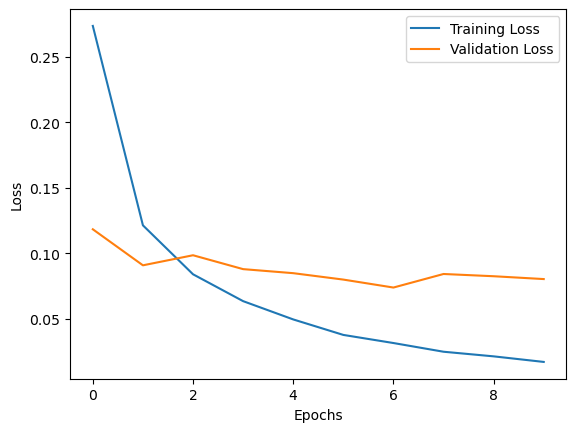

In [51]:
model_3_Patient = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

# 4) Compile Model
model_3_Patient.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
]

history = model_3_Patient.fit(
    x_tr, y_tr,
    epochs=20,
    batch_size=32,
    validation_data=(x_val, y_val),
    callbacks=callbacks
)

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


Patience = 5

Epoch 1/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9196 - loss: 0.2756 - val_accuracy: 0.9670 - val_loss: 0.1234
Epoch 2/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9641 - loss: 0.1199 - val_accuracy: 0.9750 - val_loss: 0.0922
Epoch 3/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9743 - loss: 0.0823 - val_accuracy: 0.9734 - val_loss: 0.0914
Epoch 4/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9809 - loss: 0.0628 - val_accuracy: 0.9760 - val_loss: 0.0853
Epoch 5/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9851 - loss: 0.0471 - val_accuracy: 0.9776 - val_loss: 0.0749
Epoch 6/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9885 - loss: 0.0369 - val_accuracy: 0.9760 - val_loss: 0.0832
Epoch 7/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9911 - loss: 0.0292 - val_accuracy: 0.9800 - val_loss: 0.0721
Epoch 8/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9927 - loss: 0.0239 - 

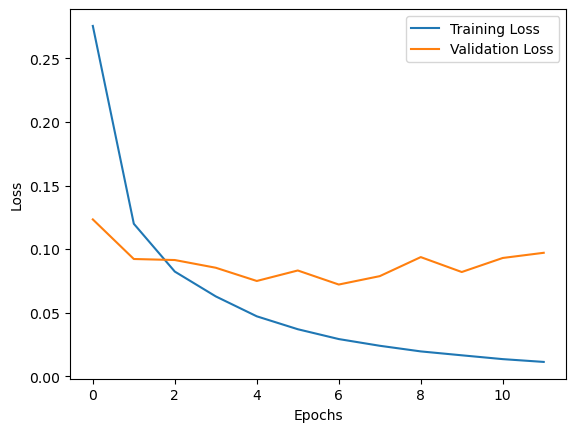

In [52]:
model_5_Patient = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

# 4) Compile Model
model_5_Patient.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)
]

history = model_5_Patient.fit(
    x_tr, y_tr,
    epochs=20,
    batch_size=32,
    validation_data=(x_val, y_val),
    callbacks=callbacks
)

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


## Task 5

No Dropout

Epoch 1/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9226 - loss: 0.2715 - val_accuracy: 0.9664 - val_loss: 0.1158
Epoch 2/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9658 - loss: 0.1162 - val_accuracy: 0.9750 - val_loss: 0.0957
Epoch 3/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9756 - loss: 0.0803 - val_accuracy: 0.9762 - val_loss: 0.0874
Epoch 4/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9811 - loss: 0.0609 - val_accuracy: 0.9766 - val_loss: 0.0826
Epoch 5/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9848 - loss: 0.0476 - val_accuracy: 0.9790 - val_loss: 0.0728


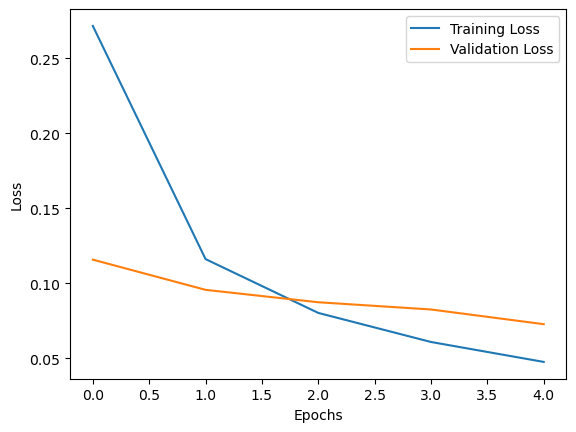

In [53]:
model_no_Dropout = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

# 4) Compile Model
model_no_Dropout.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
]

history = model_no_Dropout.fit(
    x_tr, y_tr,
    epochs=5,
    batch_size=32,
    validation_data=(x_val, y_val),
    callbacks=callbacks
)

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


0.1 Dropout

Epoch 1/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9176 - loss: 0.2887 - val_accuracy: 0.9674 - val_loss: 0.1200
Epoch 2/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9600 - loss: 0.1340 - val_accuracy: 0.9736 - val_loss: 0.0925
Epoch 3/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9703 - loss: 0.0968 - val_accuracy: 0.9782 - val_loss: 0.0804
Epoch 4/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9768 - loss: 0.0750 - val_accuracy: 0.9794 - val_loss: 0.0753
Epoch 5/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9807 - loss: 0.0623 - val_accuracy: 0.9800 - val_loss: 0.0678


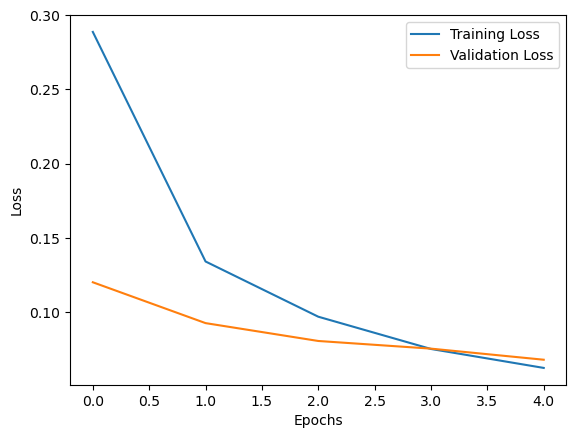

In [54]:
model_01_Dropout = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dropout(0.1),   # prevent overfitting
    keras.layers.Dense(10, activation="softmax")
])

# 4) Compile Model
model_01_Dropout.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
              
callbacks = [
    keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
]

history = model_01_Dropout.fit(
    x_tr, y_tr,
    epochs=5,
    batch_size=32,
    validation_data=(x_val, y_val),
    callbacks=callbacks
)

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

0.3 Dropout

Epoch 1/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9023 - loss: 0.3363 - val_accuracy: 0.9680 - val_loss: 0.1258
Epoch 2/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9495 - loss: 0.1694 - val_accuracy: 0.9758 - val_loss: 0.0923
Epoch 3/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9606 - loss: 0.1322 - val_accuracy: 0.9758 - val_loss: 0.0829
Epoch 4/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9667 - loss: 0.1097 - val_accuracy: 0.9768 - val_loss: 0.0833
Epoch 5/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9704 - loss: 0.0984 - val_accuracy: 0.9782 - val_loss: 0.0768


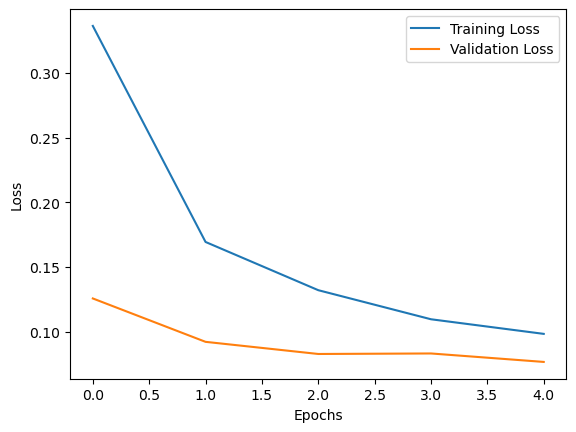

(784, 128)


In [56]:
model_03_Dropout = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dropout(0.3),   # prevent overfitting
    keras.layers.Dense(10, activation="softmax")
])

# 4) Compile Model
model_03_Dropout.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
              
callbacks = [
    keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
]

history = model_03_Dropout.fit(
    x_tr, y_tr,
    epochs=5,
    batch_size=32,
    validation_data=(x_val, y_val),
    callbacks=callbacks
)

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

w_model_03_Dropout, b = model_03_Dropout.layers[1].get_weights()
print(w_model_03_Dropout.shape)

## Task 6

0.0001 Regularization

In [57]:
model_00001_Regularization = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation="relu", kernel_regularizer=keras.regularizers.l2(0.0001)),
    keras.layers.Dropout(0.1),   # prevent overfitting
    keras.layers.Dense(10, activation="softmax")
])

# 4) Compile Model
model_00001_Regularization.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
              
callbacks = [
    keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
]

history = model_00001_Regularization.fit(
    x_tr, y_tr,
    epochs=5,
    batch_size=32,
    validation_data=(x_val, y_val),
    callbacks=callbacks
)


Epoch 1/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9176 - loss: 0.3105 - val_accuracy: 0.9680 - val_loss: 0.1494
Epoch 2/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9593 - loss: 0.1676 - val_accuracy: 0.9746 - val_loss: 0.1241
Epoch 3/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9691 - loss: 0.1359 - val_accuracy: 0.9802 - val_loss: 0.1129
Epoch 4/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9730 - loss: 0.1220 - val_accuracy: 0.9774 - val_loss: 0.1158
Epoch 5/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9766 - loss: 0.1116 - val_accuracy: 0.9796 - val_loss: 0.1113


0.001 Regularization

In [58]:
model_0001_Regularization = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation="relu", kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.1),   # prevent overfitting
    keras.layers.Dense(10, activation="softmax")
])

# 4) Compile Model
model_0001_Regularization.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
              
callbacks = [
    keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
]

history = model_0001_Regularization.fit(
    x_tr, y_tr,
    epochs=5,
    batch_size=32,
    validation_data=(x_val, y_val),
    callbacks=callbacks
)


Epoch 1/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9131 - loss: 0.4138 - val_accuracy: 0.9614 - val_loss: 0.2376
Epoch 2/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9520 - loss: 0.2541 - val_accuracy: 0.9714 - val_loss: 0.1926
Epoch 3/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9591 - loss: 0.2232 - val_accuracy: 0.9724 - val_loss: 0.1887
Epoch 4/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9623 - loss: 0.2091 - val_accuracy: 0.9742 - val_loss: 0.1704
Epoch 5/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9639 - loss: 0.1996 - val_accuracy: 0.9778 - val_loss: 0.1660


0.01 Regularization

In [60]:
model_001_Regularization = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation="relu", kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.Dropout(0.1),   # prevent overfitting
    keras.layers.Dense(10, activation="softmax")
])

# 4) Compile Model
model_001_Regularization.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
              
callbacks = [
    keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
]

history = model_001_Regularization.fit(
    x_tr, y_tr,
    epochs=5,
    batch_size=32,
    validation_data=(x_val, y_val),
    callbacks=callbacks
)

w_model_001_Regularization, b = model_001_Regularization.layers[1].get_weights()
print(w_model_001_Regularization.shape)

Epoch 1/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8903 - loss: 0.6583 - val_accuracy: 0.9468 - val_loss: 0.3704
Epoch 2/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9210 - loss: 0.4311 - val_accuracy: 0.9476 - val_loss: 0.3461
Epoch 3/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9300 - loss: 0.3924 - val_accuracy: 0.9554 - val_loss: 0.3185
Epoch 4/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9354 - loss: 0.3713 - val_accuracy: 0.9564 - val_loss: 0.3083
Epoch 5/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9364 - loss: 0.3610 - val_accuracy: 0.9624 - val_loss: 0.2925
(784, 128)


## Task 7

SGD LR=0.01

Epoch 1/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8055 - loss: 0.7333 - val_accuracy: 0.9170 - val_loss: 0.3161
Epoch 2/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8925 - loss: 0.3794 - val_accuracy: 0.9346 - val_loss: 0.2480
Epoch 3/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9085 - loss: 0.3237 - val_accuracy: 0.9424 - val_loss: 0.2182
Epoch 4/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9196 - loss: 0.2852 - val_accuracy: 0.9482 - val_loss: 0.1956
Epoch 5/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9262 - loss: 0.2587 - val_accuracy: 0.9542 - val_loss: 0.1785


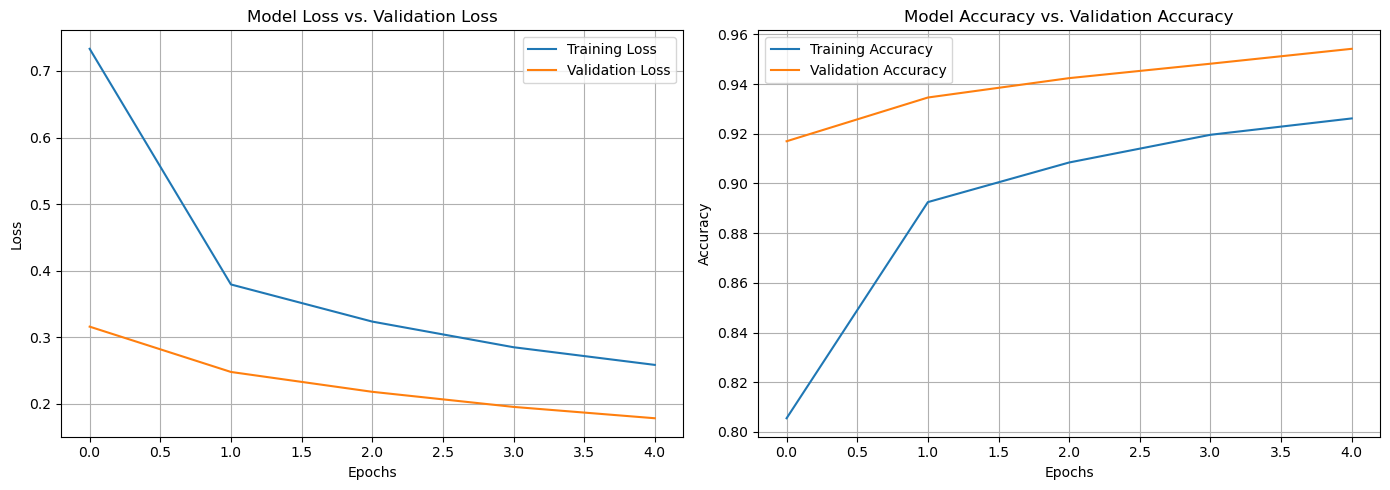

In [ ]:
from tensorflow.keras.optimizers import SGD

model_SGD_1 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dropout(0.1),   # prevent overfitting
    keras.layers.Dense(10, activation="softmax")
])


model_SGD_1.compile(optimizer="sgd", 
                    loss="sparse_categorical_crossentropy",
                    metrics=["accuracy"])

              
callbacks = [
    keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
]

history = model_SGD_1.fit(
    x_tr, y_tr,
    epochs=5,
    batch_size=32,
    validation_data=(x_val, y_val),
    callbacks=callbacks
)

fig, ax = plt.subplots(1, 2, figsize=(14, 5))

ax[0].plot(history.history['loss'], label='Training Loss')
ax[0].plot(history.history['val_loss'], label='Validation Loss')
ax[0].set_title('Model Loss vs. Validation Loss')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[0].legend()
ax[0].grid(True)

ax[1].plot(history.history['accuracy'], label='Training Accuracy')
ax[1].plot(history.history['val_accuracy'], label='Validation Accuracy')
ax[1].set_title('Model Accuracy vs. Validation Accuracy')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')
ax[1].legend()
ax[1].grid(True)

plt.tight_layout()
plt.show()


SGD Momentum

Epoch 1/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9005 - loss: 0.3392 - val_accuracy: 0.9614 - val_loss: 0.1420
Epoch 2/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9521 - loss: 0.1651 - val_accuracy: 0.9722 - val_loss: 0.1026
Epoch 3/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9633 - loss: 0.1250 - val_accuracy: 0.9744 - val_loss: 0.0915
Epoch 4/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9703 - loss: 0.1009 - val_accuracy: 0.9796 - val_loss: 0.0803
Epoch 5/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9731 - loss: 0.0873 - val_accuracy: 0.9774 - val_loss: 0.0769


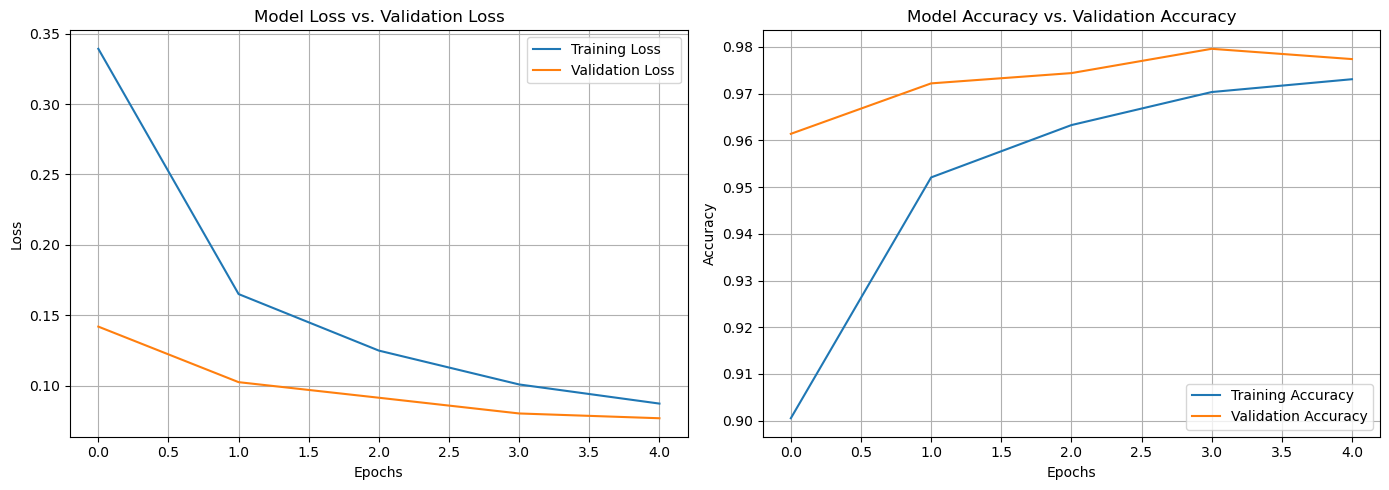

In [62]:
model_SGD_Momentum = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dropout(0.1),   # prevent overfitting
    keras.layers.Dense(10, activation="softmax")
])

custom_sgd_optimizer = SGD(learning_rate=0.01, momentum=0.9, nesterov=False)

model_SGD_Momentum.compile(optimizer=custom_sgd_optimizer,
                           loss="sparse_categorical_crossentropy",
                           metrics=["accuracy"])
              
callbacks = [
    keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
]

history = model_SGD_Momentum.fit(
    x_tr, y_tr,
    epochs=5,
    batch_size=32,
    validation_data=(x_val, y_val),
    callbacks=callbacks
)

fig, ax = plt.subplots(1, 2, figsize=(14, 5))

ax[0].plot(history.history['loss'], label='Training Loss')
ax[0].plot(history.history['val_loss'], label='Validation Loss')
ax[0].set_title('Model Loss vs. Validation Loss')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[0].legend()
ax[0].grid(True)

ax[1].plot(history.history['accuracy'], label='Training Accuracy')
ax[1].plot(history.history['val_accuracy'], label='Validation Accuracy')
ax[1].set_title('Model Accuracy vs. Validation Accuracy')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')
ax[1].legend()
ax[1].grid(True)

plt.tight_layout()
plt.show()


Adam

Epoch 1/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9167 - loss: 0.2869 - val_accuracy: 0.9672 - val_loss: 0.1167
Epoch 2/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9609 - loss: 0.1313 - val_accuracy: 0.9736 - val_loss: 0.0873
Epoch 3/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9716 - loss: 0.0942 - val_accuracy: 0.9754 - val_loss: 0.0805
Epoch 4/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9772 - loss: 0.0754 - val_accuracy: 0.9794 - val_loss: 0.0743
Epoch 5/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9807 - loss: 0.0615 - val_accuracy: 0.9804 - val_loss: 0.0748


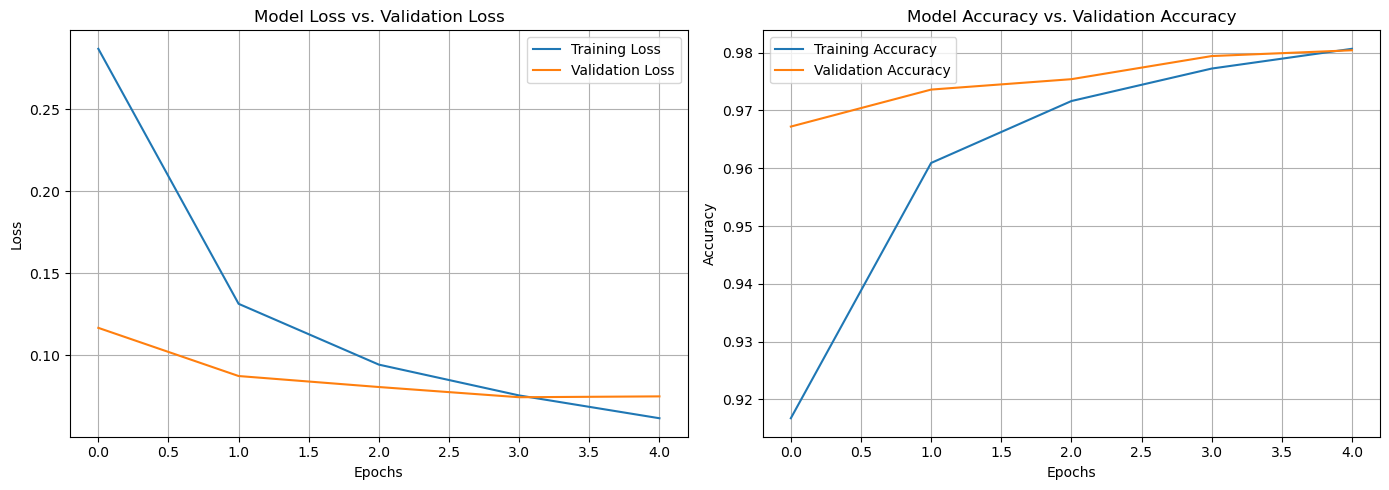

In [63]:
model_Adam = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dropout(0.1),   # prevent overfitting
    keras.layers.Dense(10, activation="softmax")
])

# 4) Compile Model
model_Adam.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
              
callbacks = [
    keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
]

history = model_Adam.fit(
    x_tr, y_tr,
    epochs=5,
    batch_size=32,
    validation_data=(x_val, y_val),
    callbacks=callbacks
)

fig, ax = plt.subplots(1, 2, figsize=(14, 5))

ax[0].plot(history.history['loss'], label='Training Loss')
ax[0].plot(history.history['val_loss'], label='Validation Loss')
ax[0].set_title('Model Loss vs. Validation Loss')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[0].legend()
ax[0].grid(True)

ax[1].plot(history.history['accuracy'], label='Training Accuracy')
ax[1].plot(history.history['val_accuracy'], label='Validation Accuracy')
ax[1].set_title('Model Accuracy vs. Validation Accuracy')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')
ax[1].legend()
ax[1].grid(True)

plt.tight_layout()
plt.show()


AdamW

Epoch 1/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9145 - loss: 0.2910 - val_accuracy: 0.9676 - val_loss: 0.1201
Epoch 2/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9588 - loss: 0.1375 - val_accuracy: 0.9740 - val_loss: 0.0936
Epoch 3/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9700 - loss: 0.0998 - val_accuracy: 0.9790 - val_loss: 0.0772
Epoch 4/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9747 - loss: 0.0799 - val_accuracy: 0.9810 - val_loss: 0.0742
Epoch 5/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9797 - loss: 0.0654 - val_accuracy: 0.9778 - val_loss: 0.0772


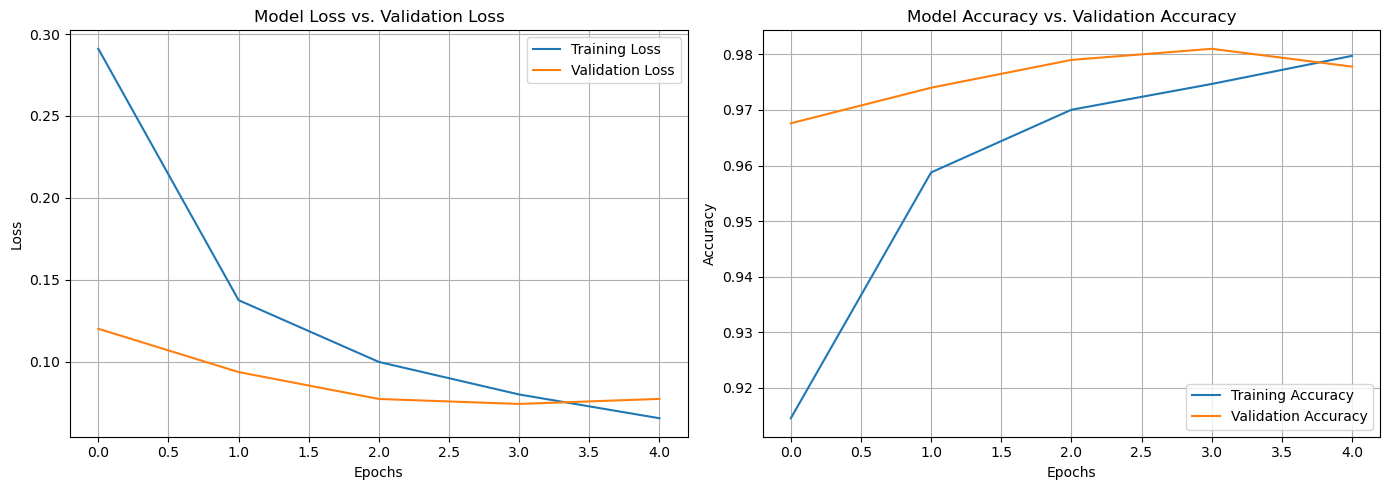

In [64]:
from tensorflow.keras.optimizers import AdamW

model_AdamW = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dropout(0.1),   # prevent overfitting
    keras.layers.Dense(10, activation="softmax")
])

adamw_optimizer = AdamW(
    learning_rate=0.001,  # Standard Adam learning rate
    weight_decay=0.01,    # The new weight decay parameter for AdamW
    beta_1=0.9,           # Standard Adam beta_1
    beta_2=0.999          # Standard Adam beta_2
)

# Compile the model using the AdamW optimizer
model_AdamW.compile(
    optimizer=adamw_optimizer,
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)    
callbacks = [
    keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
]

history = model_AdamW.fit(
    x_tr, y_tr,
    epochs=5,
    batch_size=32,
    validation_data=(x_val, y_val),
    callbacks=callbacks
)

fig, ax = plt.subplots(1, 2, figsize=(14, 5))

ax[0].plot(history.history['loss'], label='Training Loss')
ax[0].plot(history.history['val_loss'], label='Validation Loss')
ax[0].set_title('Model Loss vs. Validation Loss')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[0].legend()
ax[0].grid(True)

ax[1].plot(history.history['accuracy'], label='Training Accuracy')
ax[1].plot(history.history['val_accuracy'], label='Validation Accuracy')
ax[1].set_title('Model Accuracy vs. Validation Accuracy')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')
ax[1].legend()
ax[1].grid(True)

plt.tight_layout()
plt.show()


## Task 8

8 batch size

In [65]:
model_8_batch_size = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dropout(0.1),   # prevent overfitting
    keras.layers.Dense(10, activation="softmax")
])

# 4) Compile Model
model_8_batch_size.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
              
callbacks = [
    keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
]

history = model_8_batch_size.fit(
    x_tr, y_tr,
    epochs=5,
    batch_size=8,
    validation_data=(x_val, y_val),
    callbacks=callbacks
)


Epoch 1/5
6875/6875 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9294 - loss: 0.2366 - val_accuracy: 0.9688 - val_loss: 0.1036
Epoch 2/5
6875/6875 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - accuracy: 0.9649 - loss: 0.1132 - val_accuracy: 0.9750 - val_loss: 0.0828
Epoch 3/5
6875/6875 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - accuracy: 0.9733 - loss: 0.0841 - val_accuracy: 0.9746 - val_loss: 0.0859
Epoch 4/5
6875/6875 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9787 - loss: 0.0683 - val_accuracy: 0.9810 - val_loss: 0.0814
Epoch 5/5
6875/6875 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - accuracy: 0.9810 - loss: 0.0578 - val_accuracy: 0.9788 - val_loss: 0.0799


32 batch size

In [66]:
model_32_batch_size = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dropout(0.1),   # prevent overfitting
    keras.layers.Dense(10, activation="softmax")
])

# 4) Compile Model
model_32_batch_size.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
              
callbacks = [
    keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
]

history = model_32_batch_size.fit(
    x_tr, y_tr,
    epochs=5,
    batch_size=32,
    validation_data=(x_val, y_val),
    callbacks=callbacks
)


Epoch 1/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9164 - loss: 0.2884 - val_accuracy: 0.9664 - val_loss: 0.1243
Epoch 2/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9609 - loss: 0.1314 - val_accuracy: 0.9758 - val_loss: 0.0902
Epoch 3/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9709 - loss: 0.0955 - val_accuracy: 0.9786 - val_loss: 0.0735
Epoch 4/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9770 - loss: 0.0747 - val_accuracy: 0.9794 - val_loss: 0.0793
Epoch 5/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9814 - loss: 0.0595 - val_accuracy: 0.9798 - val_loss: 0.0693


128 batch size

In [67]:
model_128_batch_size = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dropout(0.1),   # prevent overfitting
    keras.layers.Dense(10, activation="softmax")
])

# 4) Compile Model
model_128_batch_size.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
              
callbacks = [
    keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
]

history = model_128_batch_size.fit(
    x_tr, y_tr,
    epochs=5,
    batch_size=128,
    validation_data=(x_val, y_val),
    callbacks=callbacks
)


Epoch 1/5
430/430 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8882 - loss: 0.3980 - val_accuracy: 0.9572 - val_loss: 0.1630
Epoch 2/5
430/430 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9457 - loss: 0.1875 - val_accuracy: 0.9664 - val_loss: 0.1176
Epoch 3/5
430/430 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9602 - loss: 0.1375 - val_accuracy: 0.9734 - val_loss: 0.1003
Epoch 4/5
430/430 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9669 - loss: 0.1106 - val_accuracy: 0.9776 - val_loss: 0.0861
Epoch 5/5
430/430 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9725 - loss: 0.0930 - val_accuracy: 0.9780 - val_loss: 0.0815


## Task 9

Tanh

In [68]:
model_Tanh = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation="tanh"),
    keras.layers.Dropout(0.1),   # prevent overfitting
    keras.layers.Dense(10, activation="softmax")
])

# 4) Compile Model
model_Tanh.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
              
callbacks = [
    keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
]

history = model_Tanh.fit(
    x_tr, y_tr,
    epochs=5,
    batch_size=32,
    validation_data=(x_val, y_val),
    callbacks=callbacks
)


Epoch 1/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9107 - loss: 0.3127 - val_accuracy: 0.9590 - val_loss: 0.1467
Epoch 2/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9497 - loss: 0.1698 - val_accuracy: 0.9698 - val_loss: 0.1110
Epoch 3/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9631 - loss: 0.1244 - val_accuracy: 0.9730 - val_loss: 0.0942
Epoch 4/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9695 - loss: 0.0998 - val_accuracy: 0.9768 - val_loss: 0.0840
Epoch 5/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9749 - loss: 0.0813 - val_accuracy: 0.9746 - val_loss: 0.0880


Softsign

In [69]:
model_Softsign = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation="softsign"),
    keras.layers.Dropout(0.1),   # prevent overfitting
    keras.layers.Dense(10, activation="softmax")
])

# 4) Compile Model
model_Softsign.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
              
callbacks = [
    keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
]

history = model_Softsign.fit(
    x_tr, y_tr,
    epochs=5,
    batch_size=32,
    validation_data=(x_val, y_val),
    callbacks=callbacks
)


Epoch 1/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9062 - loss: 0.3314 - val_accuracy: 0.9526 - val_loss: 0.1729
Epoch 2/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9450 - loss: 0.1874 - val_accuracy: 0.9670 - val_loss: 0.1193
Epoch 3/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9578 - loss: 0.1426 - val_accuracy: 0.9704 - val_loss: 0.1082
Epoch 4/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9654 - loss: 0.1159 - val_accuracy: 0.9716 - val_loss: 0.0985
Epoch 5/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9702 - loss: 0.0975 - val_accuracy: 0.9746 - val_loss: 0.0867


GELU

In [70]:
model_GELU = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation="gelu"),
    keras.layers.Dropout(0.1),   # prevent overfitting
    keras.layers.Dense(10, activation="softmax")
])

# 4) Compile Model
model_GELU.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
              
callbacks = [
    keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
]

history = model_GELU.fit(
    x_tr, y_tr,
    epochs=5,
    batch_size=32,
    validation_data=(x_val, y_val),
    callbacks=callbacks
)


Epoch 1/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9184 - loss: 0.2804 - val_accuracy: 0.9666 - val_loss: 0.1202
Epoch 2/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9629 - loss: 0.1248 - val_accuracy: 0.9734 - val_loss: 0.0906
Epoch 3/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9729 - loss: 0.0888 - val_accuracy: 0.9794 - val_loss: 0.0736
Epoch 4/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9785 - loss: 0.0679 - val_accuracy: 0.9804 - val_loss: 0.0770
Epoch 5/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9820 - loss: 0.0563 - val_accuracy: 0.9786 - val_loss: 0.0760


## Task 10

In [71]:
model_10 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

# 4) Compile Model
model_10.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
              
callbacks = [
    keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
]

history = model_10.fit(
    x_tr, y_tr,
    epochs=5,
    batch_size=32,
    validation_data=(x_val, y_val),
    callbacks=callbacks
)


w, b = model.layers[1].get_weights()
print(w.shape)


Epoch 1/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9238 - loss: 0.2680 - val_accuracy: 0.9690 - val_loss: 0.1103
Epoch 2/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9644 - loss: 0.1174 - val_accuracy: 0.9732 - val_loss: 0.0914
Epoch 3/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9760 - loss: 0.0799 - val_accuracy: 0.9736 - val_loss: 0.0896
Epoch 4/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9815 - loss: 0.0603 - val_accuracy: 0.9746 - val_loss: 0.0910
Epoch 5/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9854 - loss: 0.0473 - val_accuracy: 0.9794 - val_loss: 0.0749
(784, 128)


Normal weights

In [ ]:
df_w = pd.DataFrame(w)
df_w.describe().T

,count,mean,std,min,25%,50%,75%,max
0,784.0,-0.011709,0.128767,-0.471435,-0.082057,-0.012887,0.064913,0.406551
1,784.0,-0.016748,0.114733,-0.446288,-0.079819,-0.010274,0.052625,0.305849
2,784.0,0.007900,0.118292,-0.461536,-0.059867,0.012706,0.081213,0.324712
3,784.0,-0.010295,0.121887,-0.533761,-0.080752,-0.003849,0.070029,0.324860
4,784.0,-0.028938,0.130338,-0.422333,-0.103287,-0.023147,0.055903,0.368517
...,...,...,...,...,...,...,...,...
123,784.0,0.019004,0.125116,-0.407523,-0.059037,0.013144,0.084303,0.556953
124,784.0,0.003245,0.138974,-0.462502,-0.078255,0.008813,0.087493,0.492314
125,784.0,-0.007988,0.125593,-0.373586,-0.083797,-0.011072,0.060864,0.474139
126,784.0,-0.026069,0.131055,-0.469878,-0.104353,-0.015468,0.062096,0.445970


With 0.3 Dropout

In [ ]:
df_w_model_03_Dropout = pd.DataFrame(w_model_03_Dropout)
df_w_model_03_Dropout.describe().T

,count,mean,std,min,25%,50%,75%,max
0,784.0,-0.011709,0.128767,-0.471435,-0.082057,-0.012887,0.064913,0.406551
1,784.0,-0.016748,0.114733,-0.446288,-0.079819,-0.010274,0.052625,0.305849
2,784.0,0.007900,0.118292,-0.461536,-0.059867,0.012706,0.081213,0.324712
3,784.0,-0.010295,0.121887,-0.533761,-0.080752,-0.003849,0.070029,0.324860
4,784.0,-0.028938,0.130338,-0.422333,-0.103287,-0.023147,0.055903,0.368517
...,...,...,...,...,...,...,...,...
123,784.0,0.019004,0.125116,-0.407523,-0.059037,0.013144,0.084303,0.556953
124,784.0,0.003245,0.138974,-0.462502,-0.078255,0.008813,0.087493,0.492314
125,784.0,-0.007988,0.125593,-0.373586,-0.083797,-0.011072,0.060864,0.474139
126,784.0,-0.026069,0.131055,-0.469878,-0.104353,-0.015468,0.062096,0.445970


With L2

In [ ]:
df_w_model_001_Regularization = pd.DataFrame(w_model_001_Regularization)
df_w_model_001_Regularization.describe().T


,count,mean,std,min,25%,50%,75%,max
0,784.0,0.000082,0.012539,-0.056577,-0.002436,4.750072e-34,4.040241e-03,0.071911
1,784.0,-0.000847,0.010492,-0.045543,-0.004557,-4.287445e-34,1.069066e-03,0.035786
2,784.0,-0.000164,0.010345,-0.035033,-0.003609,4.210750e-35,4.054201e-03,0.039474
3,784.0,-0.000194,0.007697,-0.027176,-0.002942,-9.444947e-35,2.071804e-03,0.029898
4,784.0,0.000463,0.009423,-0.031316,-0.002480,2.475322e-34,5.209192e-03,0.026258
...,...,...,...,...,...,...,...,...
123,784.0,-0.003597,0.012404,-0.050300,-0.008209,-1.796683e-26,2.688874e-04,0.033361
124,784.0,-0.002088,0.011150,-0.045615,-0.007645,-6.993228e-14,5.282662e-04,0.038188
125,784.0,0.000604,0.011059,-0.031072,-0.003453,6.054298e-35,2.597106e-03,0.056721
126,784.0,-0.000171,0.000343,-0.001904,-0.000169,-6.159836e-17,1.433751e-26,0.000131
